In [4]:
# Importing Data Manipilation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# **Loading Dataset**

In [6]:
# Loading the dataset

url = 'https://raw.githubusercontent.com/mukeshmagar543/CODEB_Internship/refs/heads/main/dataset_phishing.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
7039,http://www.lastingredient.com/,30,22,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,1,0,1,0,2,3,3,3,0,14,14,0,8.500000,8.50,0.00,0,0,0,0,0,0,41,0.585366,0.414634,0,1,0,0.000000,0,0.117647,0,1,61.538462,0,100.000000,0.000000,0,0,0,11.111111,0,0,0,1,1,0,358,3295,1759878,0,0,4,legitimate
9187,http://mail.midyatmimaritas.com/wp-includes/im...,70,24,0,2,1,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,0.057143,0.0,0,0,0,0,0,2,1,0,0,0,1,0,8,0,2,4,2,15,15,8,6.500000,9.50,5.50,3,0,0,0,0,0,38,0.421053,0.578947,0,2,0,0.227273,0,0.181818,0,1,42.857143,0,0.000000,100.000000,0,0,0,11.111111,0,0,0,1,1,0,318,778,0,0,1,0,phishing
1935,https://zoomic.io/wp-includes/neworder/bizmail...,145,9,0,2,2,0,1,6,0,7,1,0,0,5,0,1,0,6,0,0,0,0,0,0,0,0.096552,0.0,0,0,0,0,0,2,1,0,0,0,0,0,21,3,1,6,1,13,6,13,5.380952,6.00,5.35,2,0,0,0,0,0,8,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,58,-1,10687767,0,1,0,phishing
4915,http://www.starwalkerstudios.com/,33,25,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,17,17,0,10.000000,10.00,0.00,0,0,0,0,0,0,104,0.903846,0.096154,0,0,0,0.200000,0,0.000000,0,1,72.727273,0,42.857143,57.142857,0,0,0,100.000000,0,0,0,1,1,0,135,2421,0,0,0,4,legitimate
5670,http://www.auth-chaseuserservice.ssmailer.com/...,72,38,0,4,1,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,1,0,0,0,1,0,9,4,3,3,3,16,16,6,5.888889,7.75,4.40,0,0,0,0,0,0,103,0.932039,0.067961,0,1,0,0.142857,0,0.000000,0,1,81.818182,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,0,351,5858,0,0,1,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,http://shiflett.org/articles/session-hijacking,46,12,0,1,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,2,7,8,7,9,8,9,8.000000,8.00,8.00,0,0,0,0,0,0,48,0.958333,0.041667,0,0,0,0.000000,0,0.000000,0,1,92.857143,0,100.000000,0.000000,0,0,0,100.000000,0,0,0,0,0,0,649,7386,1213116,0,0,5,legitimate
11137,http://www.tattooartists.ru/,28,20,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,0,0,2,5,3,3,0,13,13,0,8.000000,8.00,0.00,0,0,0,0,0,0,88,0.920455,0.079545,0,0,0,0.285714,0,0.000000,0,0,50.000000,0,92.592593,7.407407,0,0,0,66.666667,0,0,0,1,0,0,115,4633,3147040,0,0,2,legitimate
1535,http://yovcxm.com/chase/Chase/ef195f766730a094...,62,10,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.370968,0.0,0,0,0,0,0,1,0,1,0,0,1,0,4,1,5,6,5,32,6,32,12

# **Getting Information about Dataset Like which column is object and which column is numerical**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

# **Checking Null Values**

In [8]:
df.isnull().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

# **Descriptive Analysis**

In [9]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

**Separating numerical and categorical columns. Then, for each numeric feature, you analyze spread, skewness, and outliers — very helpful for choosing scaling techniques or detecting which features might need transformation.**

In [10]:
numerical_columns = df.select_dtypes(exclude= 'object')
numerical_columns

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,0,0,0,0,0,0,32,0.375000,0.625000,0,1,0,0.050000,0,0.050000,0,1,16.666667,0,0.000

In [11]:
# Descriptive statistics
from collections import OrderedDict

stats = []

for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,length_url,12.0,1.641000e+03,61.126684,26.0,33.000000,71.000000,38.000000,5.529732e+01,8.085190,144.196391
1,length_hostname,4.0,2.140000e+02,21.090289,16.0,15.000000,24.000000,9.000000,1.077717e+01,5.160078,69.829931
2,ip,0.0,1.000000e+00,0.150569,0.0,0.000000,0.000000,0.000000,3.576436e-01,1.954418,1.820067
3,nb_dots,1.0,2.400000e+01,2.480752,2.0,2.000000,3.000000,1.000000,1.369686e+00,5.718117,66.155843
4,nb_hyphens,0.0,4.300000e+01,0.997550,0.0,0.000000,1.000000,1.000000,2.087087e+00,4.695239,40.696686
5,nb_at,0.0,4.000000e+00,0.022222,0.0,0.000000,0.000000,0.000000,1.554999e-01,8.272893,95.457038
6,nb_qm,0.0,3.000000e+00,0.141207,0.0,0.000000,0.000000,0.000000,3.644558e-01,2.488737,6.060591
7,nb_and,0.0,1.900000e+01,0.162292,0.0,0.000000,0.000000,0.000000,8.213374e-01,9.725295,139.140959
8,nb_or,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
9,nb_eq,0.0,1.900000e+01,0.293176,0.0,0.000000,0.000000,0.000000,9.983172e-01,6.530036,70.909580


# **Frequency distribution for categorical features**
Several features showed significant skewness, suggesting non-normal distributions.

Wide ranges and high standard deviations in some columns (e.g., web_traffic, length_url) indicate the presence of outliers.

Features with high kurtosis are likely to have heavy tails or sharp peaks.

Checking frequency counts for categorical columns — this helps you see whether categories are balanced or dominated by one class (like the target label status).

In [12]:
# Frequency distribution for categorical features (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nFrequency distribution for {col}:\n")
        print(df[col].value_counts())


Frequency distribution for url:

url
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                                                                                                                                                                                                                                                                                                                                                                                           2
https://lt.mydplr.com/16672ac75448ecdb528e1c663c0df3a7-f10ed321df1a4fbc893c86fbb12f0913                                                                                                                                                                                                                                                                                                                                                                                                        

**The target label is balanced — There is no need to use SMOTE techniques to Blanace the Target columm.**

In [13]:
df['status'].mode()

0    legitimate
1      phishing
Name: status, dtype: object

In [14]:
df['url'].mode()

0    http://e710z0ear.du.r.appspot.com/c:/users/use...
Name: url, dtype: object

# **Histogram**
Histograms Reveal skewed features and possible outliers. Some features like web_traffic or length_url may need scaling or normalization.

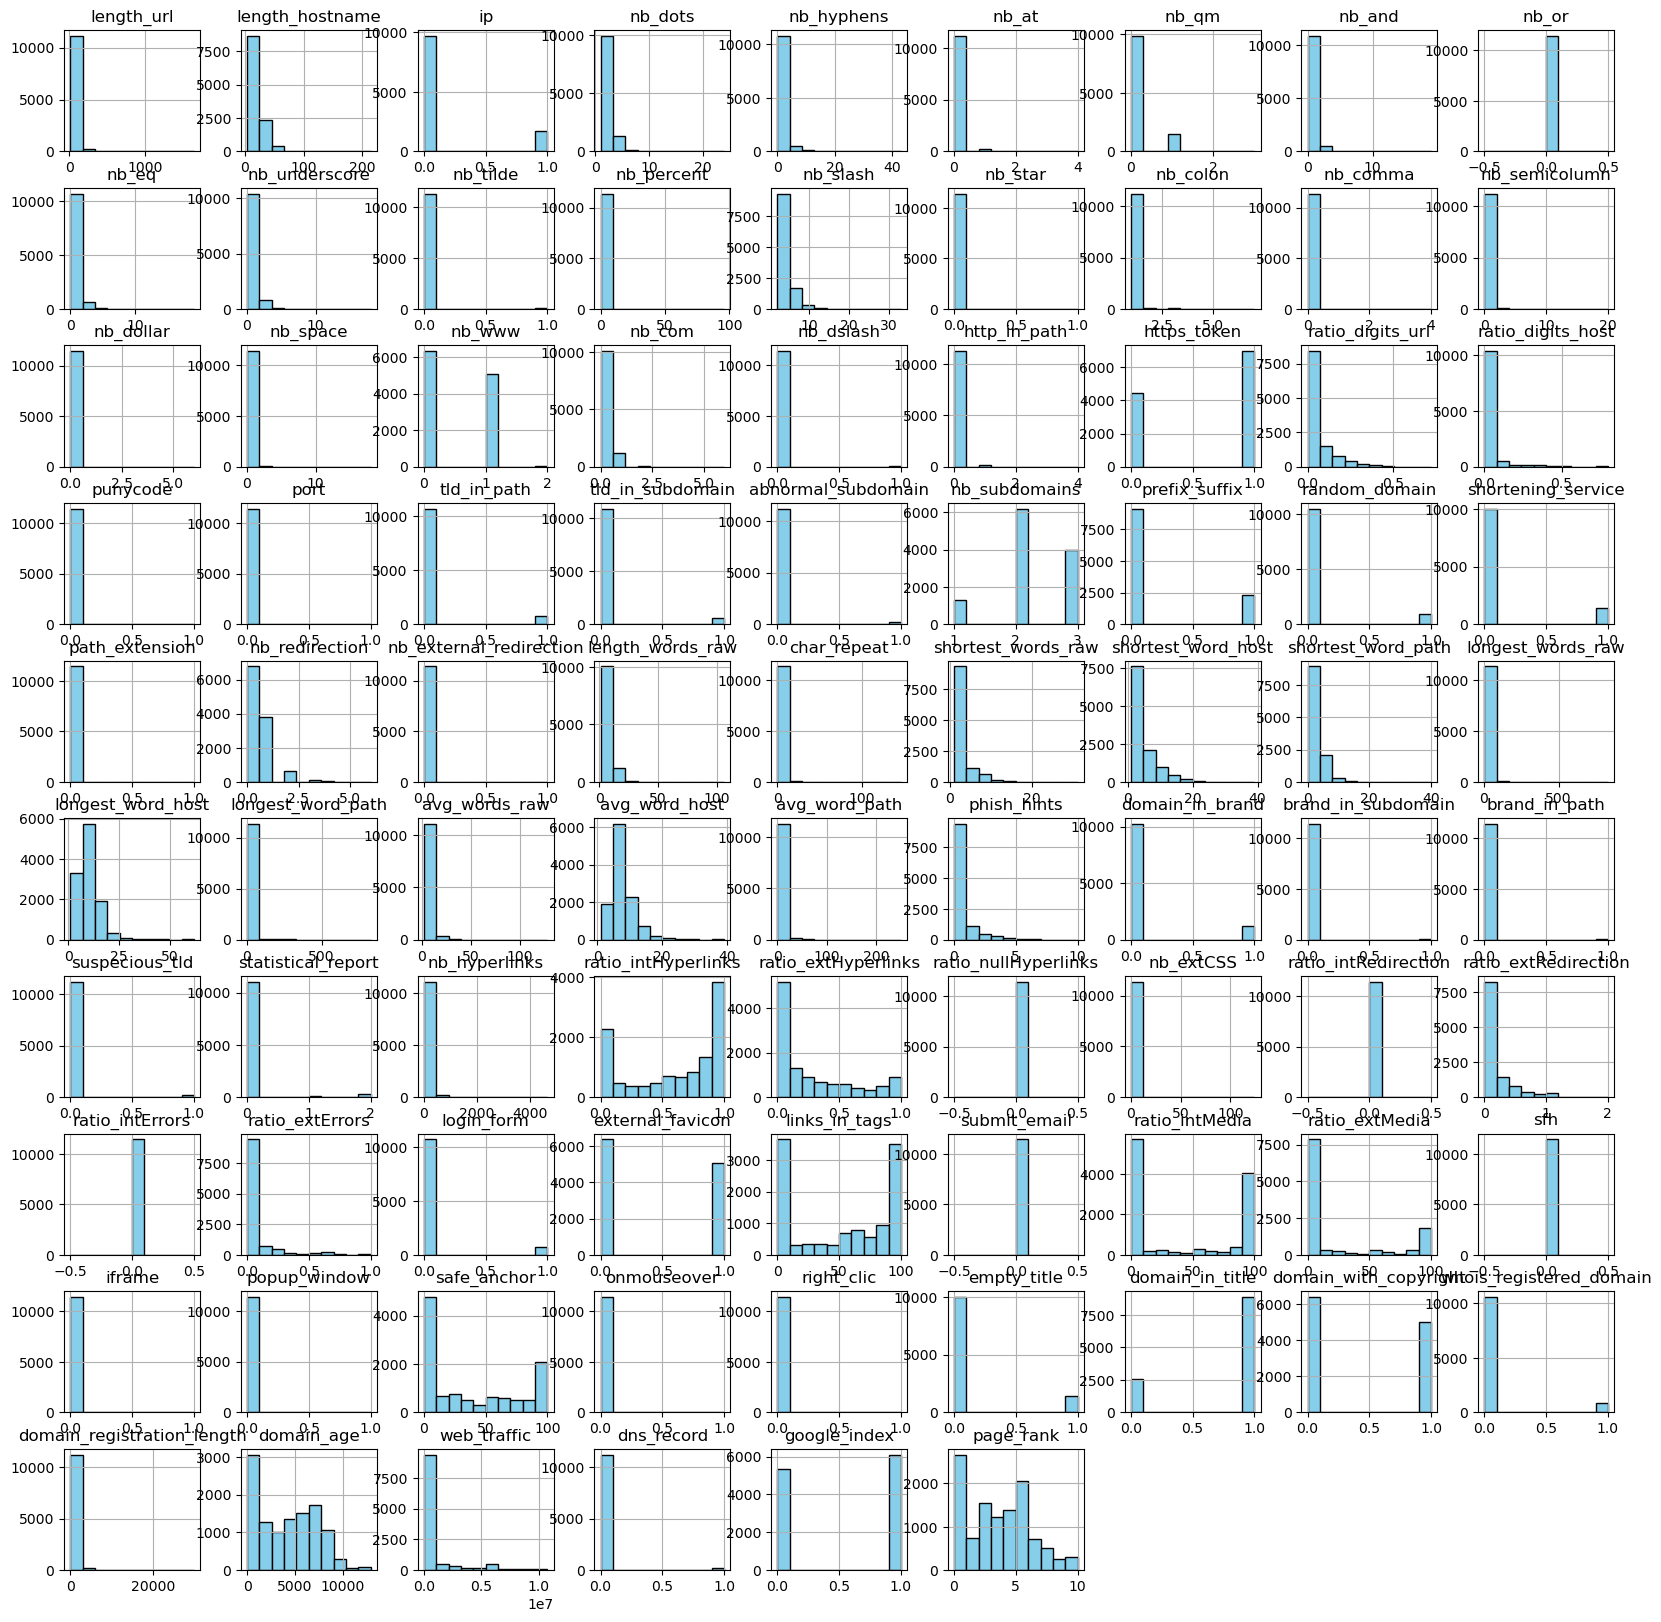

In [15]:
# Histograms for numerical features
numerical_columns.hist(figsize=(20, 20),bins= 10, color= 'skyblue', edgecolor= 'black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# **Pair Plot**
- We have use only selected important features to create the Pair Plot
- The pairplot shows some visual separation between phishing and legitimate classes in selected features — especially in ratio_digits_url and web_traffic. That means these features might be strong indicators for classification.

  

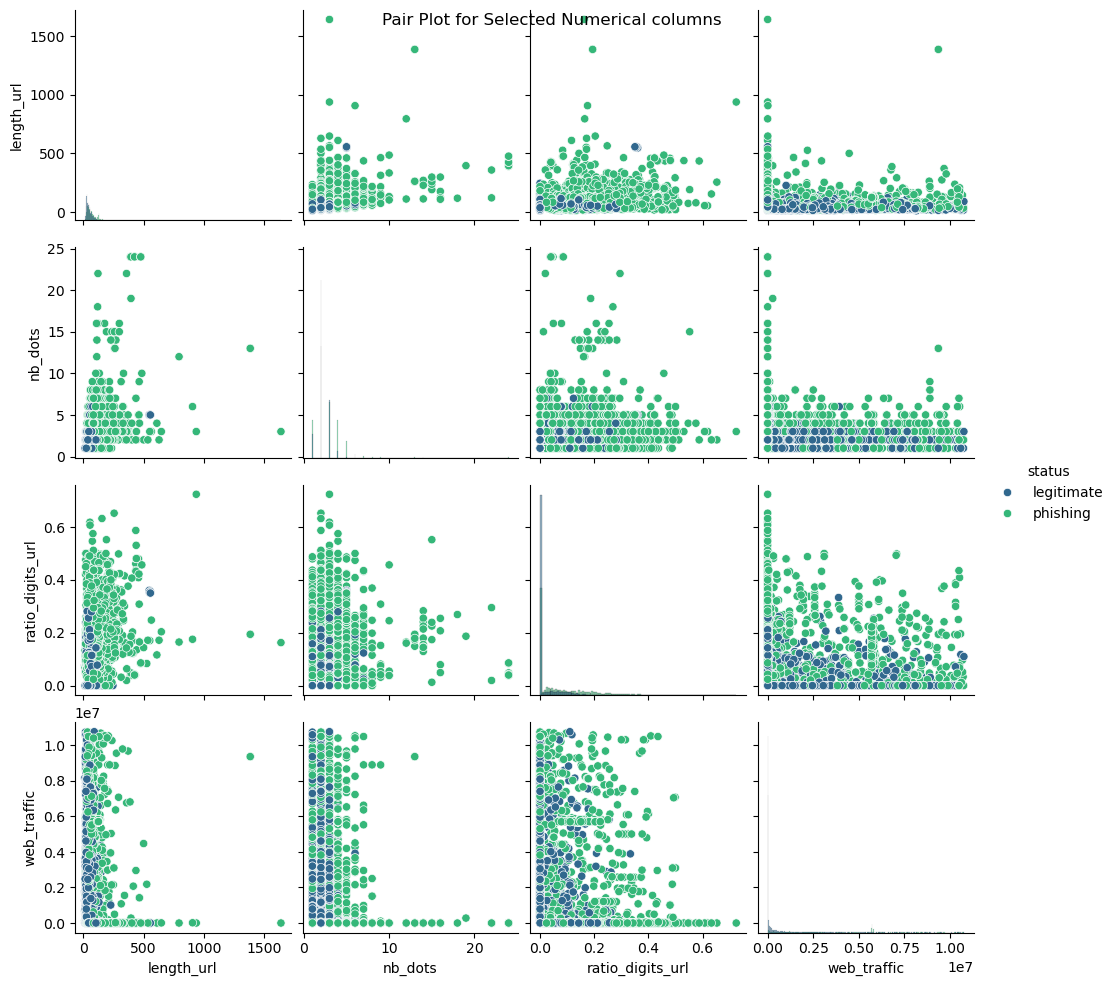

In [16]:
selected_features = ['length_url', 'nb_dots', 'ratio_digits_url', 'web_traffic', 'status']
# plot pair plot
sns.pairplot(df[selected_features], hue='status', diag_kind='hist', palette= 'viridis')
plt.suptitle('Pair Plot for Selected Numerical columns')
plt.show()

**Using Replace function to 'legitimate' and 'phishing' into 0 and 1 — readying the target for machine learning models.**

In [17]:
df['status'] = df['status'].replace({'legitimate' : 0, 'phishing' : 1})

**Label encoding to url column — to convert the categorical data into numerical**

In [18]:
# Using Label Encoding in Url column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['url'] = le.fit_transform(df['url'])
df['url'].value_counts()

url
1065    2
8258    1
363     1
62      1
4501    1
       ..
9799    1
9324    1
6684    1
9920    1
4919    1
Name: count, Length: 11429, dtype: int64

# **Insights and Recommendations**
- Features like `web_traffic`, `SSLfinal_State`, and `page_rank` are crucial indicators.
- The Dataset has huge amount of Outliers.
- Outliers can be capped using the IQR method.
- Use `RobustScaler` to normalize numerical features.
- Remove redundant features with high multicollinearity.
- The target is balance hence, there is no need for SMOTE.
- We can use Feature Engineering. 
- The Dataset have doesn't have any null values. 